In [1]:
from pathlib import Path

from dataset import ImageDataset

dataset = ImageDataset(Path("data_col_public/"))

In [2]:
len(dataset)

4700

In [14]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose(
    [
        A.Resize(600, 420),
        A.RandomCrop(512, 384),  # 4x3
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.2),
        A.Normalize(normalization="min_max"),
        ToTensorV2(),
    ],
    additional_targets={"rgb_image": "image"},
)

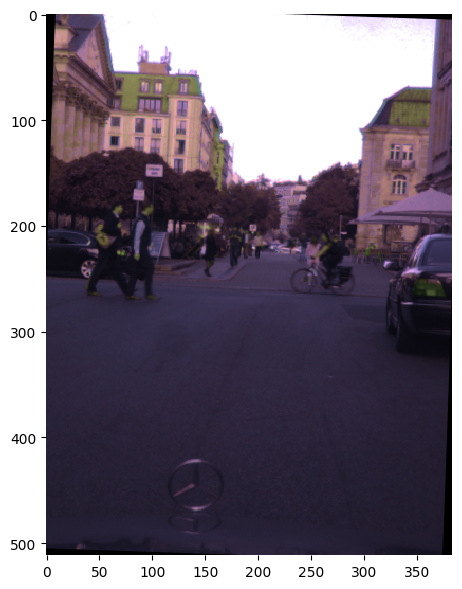

In [15]:
import matplotlib.pyplot as plt


def ishow(
    img, cmap="viridis", title="", fig_size=(8, 6), colorbar=False, interpolation="none"
):
    "Function `ishow` displays an image in a new window."

    # extent = (0, img.shape[1], img.shape[0], 0)
    img = img.permute(1, 2, 0).cpu().detach().numpy()
    fig, ax = plt.subplots(figsize=fig_size)
    pcm = ax.imshow(
        img,
        # extent=extent,
        cmap=cmap,
        interpolation=interpolation,
    )

    ax.set_frame_on(False)
    plt.title(title)
    plt.tight_layout()
    if colorbar:
        fig.colorbar(pcm, orientation="vertical")
    plt.show()


ishow(dataset[0][1])

In [19]:
def show_augmentations(ds, idx, n_samples=3):
    figure = plt.figure(figsize=(12, 8))

    rows = n_samples
    cols = 2

    for i in range(1, rows + 1):
        gray, rgb = ds[idx]

        gray_np = gray.permute(1, 2, 0).cpu().detach().numpy()
        rgb_np = rgb.permute(1, 2, 0).cpu().detach().numpy()

        if gray_np.min() < 0 or gray_np.max() > 1:
            print(
                f"The image values were shifted to the range (0, 1). The original range is ({gray_np.min():.04f}, {gray_np.max():.04f})"
            )
            gray_np = (gray_np - gray_np.min()) / (gray_np.max() - gray_np.min())
            rgb_np = (rgb_np - rgb_np.min()) / (rgb_np.max() - rgb_np.min())

        figure.add_subplot(rows, cols, i * 2 - 1)
        plt.axis("off")
        plt.imshow(
            gray_np, cmap="gray"
        )  # if you don't use cmap="gray", matplotlib will use viridis

        figure.add_subplot(rows, cols, i * 2)
        plt.axis("off")
        plt.imshow(rgb_np)

    plt.suptitle(f"Sample No {idx}")
    plt.tight_layout()
    plt.show()


In [20]:
dataset = ImageDataset(Path("data_col_public/"), train_transform)

The image values were shifted to the range (0, 1). The original range is (-0.0000, 1.0000)
The image values were shifted to the range (0, 1). The original range is (-0.0000, 1.0000)


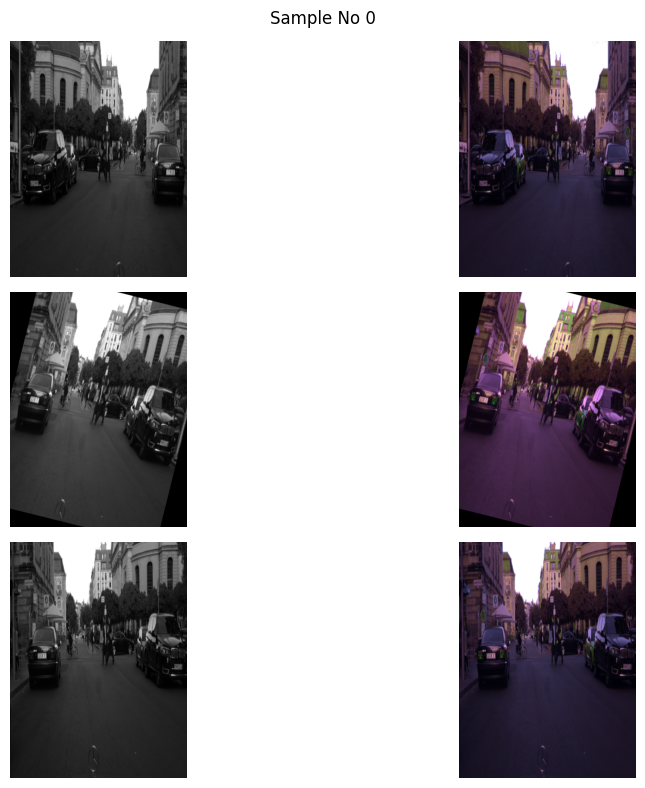

In [21]:
show_augmentations(dataset, 0)

In [22]:
from network import DownBlock, DownSampler

x = dataset[0][0]

d1 = DownBlock(1, 64, False)
d2 = DownBlock(64, 64)
d3 = DownBlock(64, 128)
d4 = DownBlock(128, 256)
d5 = DownBlock(256, 512)

In [23]:
x = x.unsqueeze(0)

In [24]:
x.shape

torch.Size([1, 1, 512, 384])

In [25]:
ds = DownSampler()

In [26]:
x = ds(x)

In [27]:
x.shape

torch.Size([1, 512, 8, 6])